## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
data = pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data=data.drop('Unnamed: 0',axis=1)

## EDA

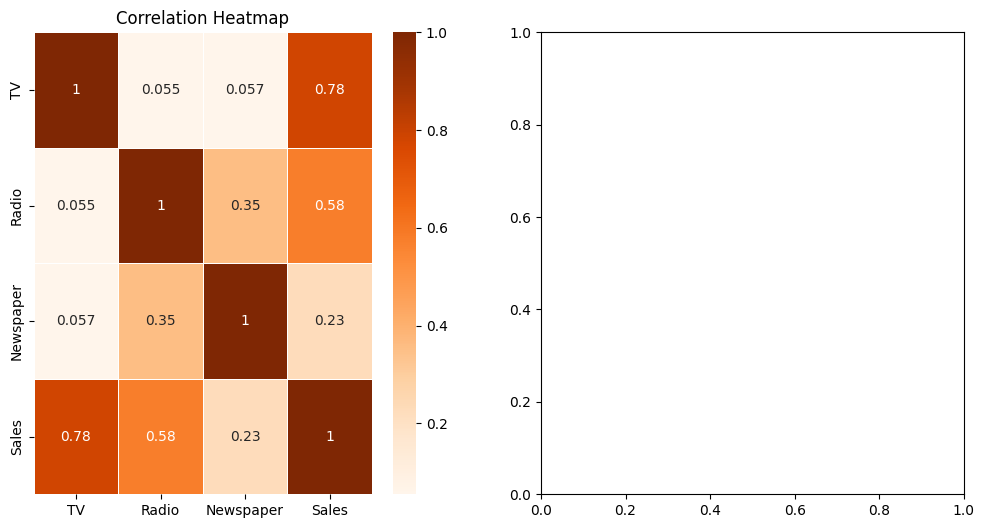

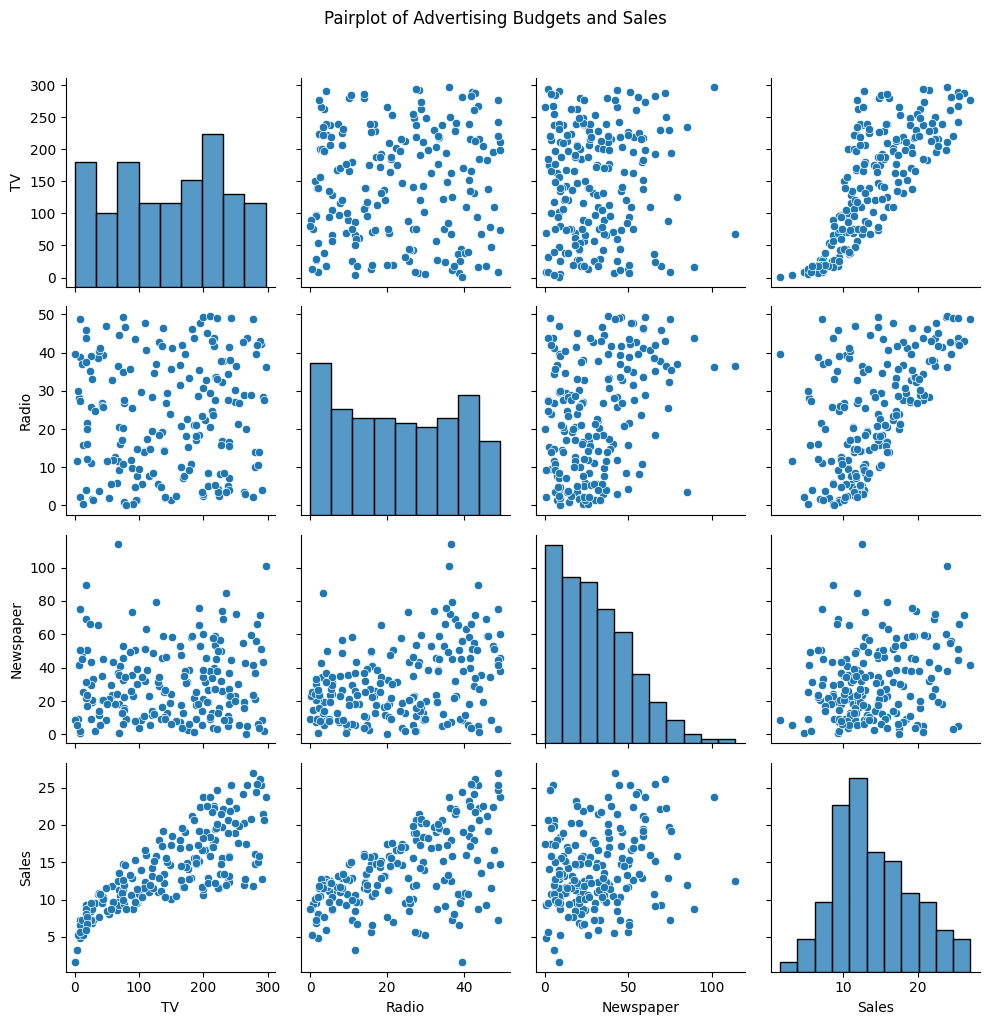

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(data.corr(), annot=True, cmap='Oranges', linewidths=0.5)
plt.title('Correlation Heatmap')

plt.subplot(1, 2, 2)
sns.pairplot(data)
plt.suptitle('Pairplot of Advertising Budgets and Sales', y=1.02)

plt.tight_layout()
plt.show()


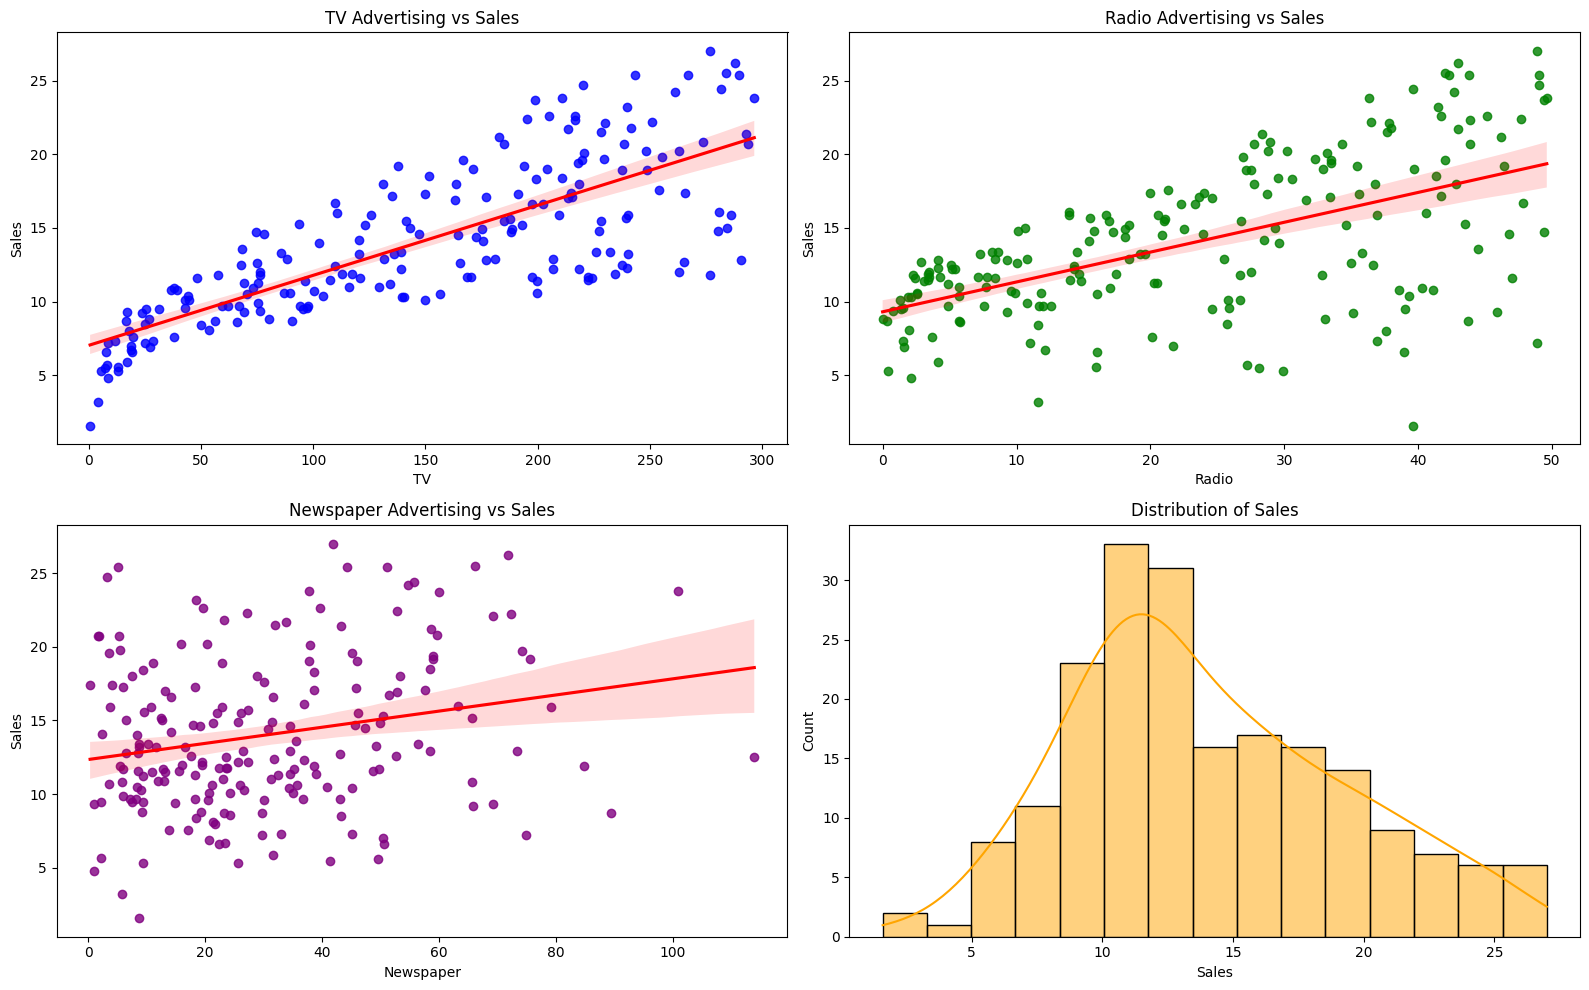

In [8]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.regplot(x='TV', y='Sales', data=data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('TV Advertising vs Sales')

plt.subplot(2, 2, 2)
sns.regplot(x='Radio', y='Sales', data=data, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('Radio Advertising vs Sales')

plt.subplot(2, 2, 3)
sns.regplot(x='Newspaper', y='Sales', data=data, scatter_kws={"color": "purple"}, line_kws={"color": "red"})
plt.title('Newspaper Advertising vs Sales')

plt.subplot(2, 2, 4)
sns.histplot(data['Sales'], bins=15, color='orange', kde=True)
plt.title('Distribution of Sales')

plt.tight_layout()
plt.show()

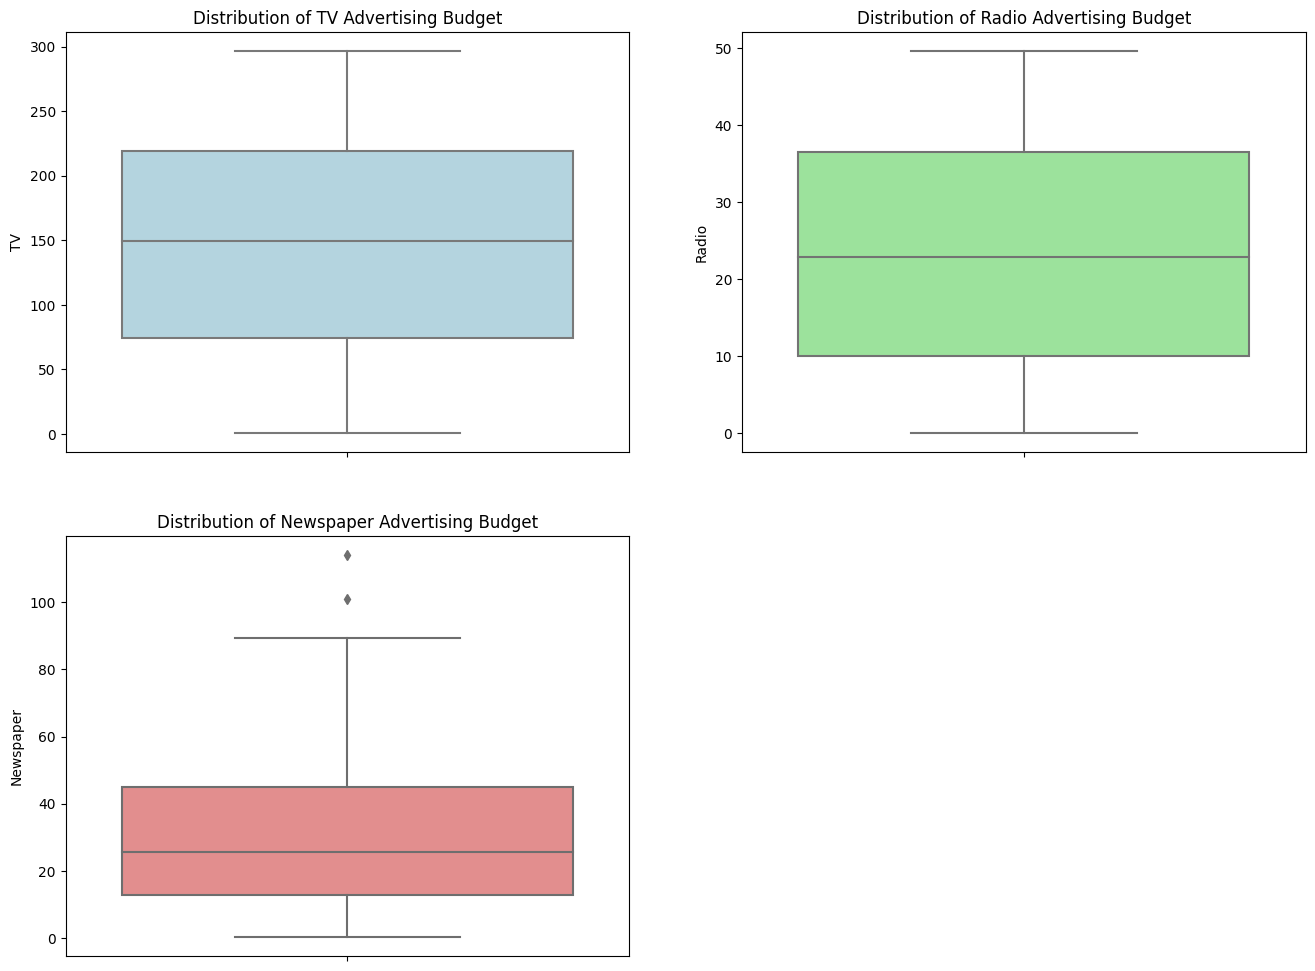

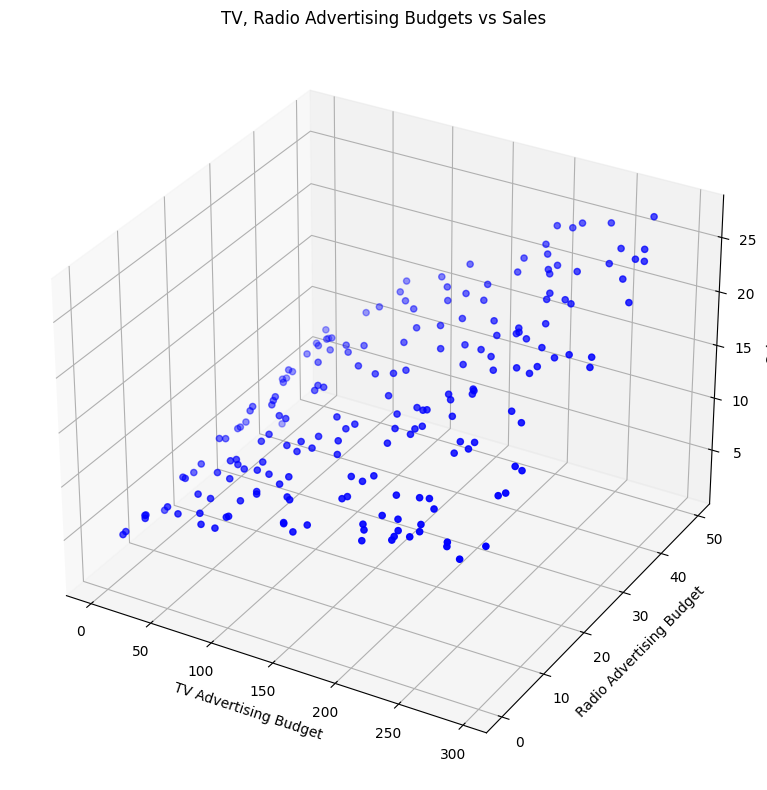

In [9]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(y='TV', data=data, color='lightblue')
plt.title('Distribution of TV Advertising Budget')

plt.subplot(2, 2, 2)
sns.boxplot(y='Radio', data=data, color='lightgreen')
plt.title('Distribution of Radio Advertising Budget')

plt.subplot(2, 2, 3)
sns.boxplot(y='Newspaper', data=data, color='lightcoral')
plt.title('Distribution of Newspaper Advertising Budget')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['TV'], data['Radio'], data['Sales'], c='b', marker='o')

ax.set_xlabel('TV Advertising Budget')
ax.set_ylabel('Radio Advertising Budget')
ax.set_zlabel('Sales')
ax.set_title('TV, Radio Advertising Budgets vs Sales')

plt.tight_layout()
plt.show()


## The Model

In [10]:
X=data.drop(['Sales'],axis=1)
y=data['Sales']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=45)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 2.1598788945851966
R-squared: 0.9070473251423641
